### Matplotlib second introduction

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

We read: https://matplotlib.org/stable/tutorials/intermediate/artists.html
It explains basic "who is who" in matplotlib

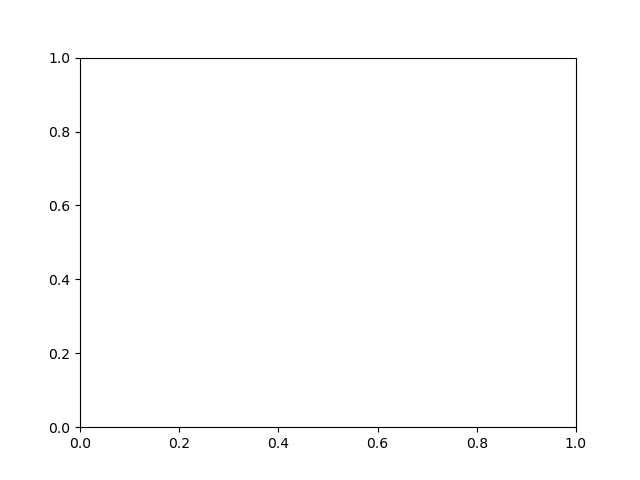

In [3]:
# creation of figure and axis for plotting
fig, ax = plt.subplots()
plt.show()

(-1.0, 1.5)

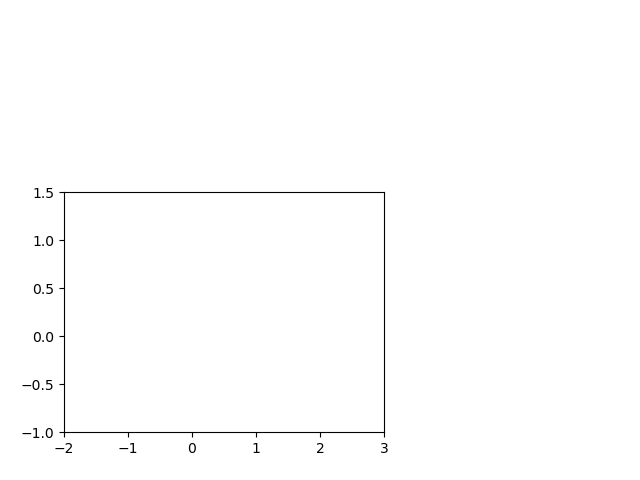

In [4]:
# adding new axes to existing figure and gow te arguments in add_axes work
fig2 = plt.figure()
ax2 = fig2.add_axes([0.1, 0.1, 0.5, 0.5])

# (add code) draw points at 0.1, 0.1 and 0.5, 0.5 
#     in the coordinate system of the Figure,
#     (say there exist many coordinate systems ?)

# set the (inner) limits.
ax2.set_xlim([-2, 3])
ax2.set_ylim([-1, 1.5])



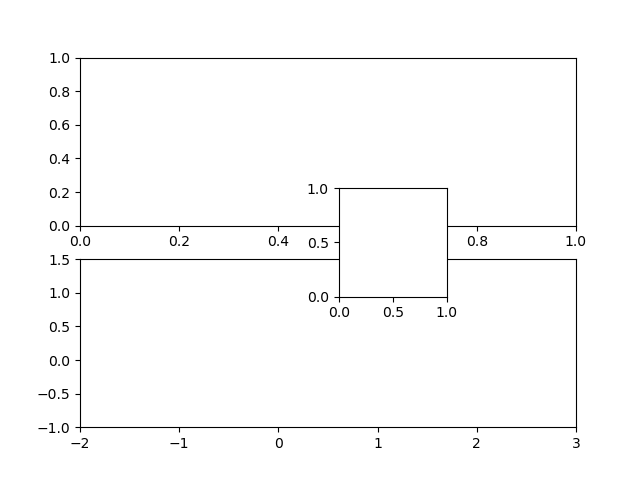

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_subplot(2, 1, 1)

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_xlim([-2, 3])
ax2.set_ylim([-1, 1.5])

ax3 = fig.add_subplot(3, 4, 7) # you can add more suplots over existing subplots

### Birds with time on a slider.

In [2]:
""" Creating birds data."""
import numpy as np
from numpy.random import default_rng, SeedSequence

### initial condition functions ###
def set_random_y0(N, seed, low=0, high=1, velo_st_dev=4):
    """Produces an initial CS_matrix"""
    rng = default_rng(SeedSequence(seed))
    
    x_s = rng.uniform(low=low, high=high, size=N) # x coordinates of intial position
    y_s = rng.uniform(low=low, high=high, size=N) # y coordinates of intial position

    vx_s = velo_st_dev*rng.standard_normal(N) # x coordinates of intial velocity
    vy_s = velo_st_dev*rng.standard_normal(N) # y coordinates of intial velocity

    y_0 = np.c_[x_s, y_s, vx_s, vy_s] #returns a CS_matrix - initial condition
    return y_0

n = 50
def comm_weight(s):
    """Communication weight in Cucker-Smale model"""
    return np.float_power(s, -1.5, out=np.zeros_like(s), where=s!=0)

from typing import Callable

# def rhs_func(t: float, y: np.ndarray, mass: np.ndarray, comm_weight: Callable)-> np.ndarray:
#     """ The splitting of dx and dv is done here. 
#             t           : independent variable in the ODE
#             y           : CS_data_point of the shape (N*4,)
#             mass        : array of "masses" we can set that some birds are more important than other
#             comm_weight : callable 'communication weight' funtion
#         """
#     def rhs_d_pos(y):
#         u = y.copy()
#         u[:,0], u[:,1] = 0, 0    # zeroing the position
#         return u[:,[2,3,0,1]]    # velocities go to the front

#     def rhs_d_vel(y, mass=0, comm_weight=0):
#         """ docs """
#         #split position and velocity
#         N = len(y)
#         vel = y.copy()
#         vel[:,0], vel[:,1] = 0, 0
#         pos = y.copy()
#         pos[:,2], pos[:,3] = 0, 0

#         # stack of matricies of all diferences of velocities
#         vel_diff = np.stack([vel]*N,axis=0) - np.stack([vel]*N,axis=1)

#         # stack of matricies of all diferences of position
#         pos_diffs = np.stack([pos]*N,axis=0) - np.stack([pos]*N,axis=1)

#         # the values of eta function on distances 
#         vcomm_weight = np.vectorize(comm_weight)
#         weighted_diffs = vcomm_weight(np.linalg.norm(pos_diffs, axis=2, keepdims=True))

#         return np.sum( weighted_diffs*vel_diff, axis=1 )

#     # N = len(y)
#     y = y.reshape(-1,4)    # this is for technical reasons = solve_ivp was not working for me with the .shape =(N, 4) so i'm using .shape=(N*4,)
#     x_derivatives = rhs_d_pos(y)
#     y_derivatives = rhs_d_vel(y, mass, comm_weight)
#     rhs = x_derivatives + y_derivatives
#     return rhs.ravel()

# y0 = set_random_y0(n,12346)

# from scipy.integrate import solve_ivp
# birds = solve_ivp(lambda t, y: rhs_func(t , y, 0, comm_weight),
#         (0, 0.2),
#         y0.ravel(),
#         method='RK45',
#         # t_eval = np.linspace(self.t0, self.t0+self.duration, int(self.duration*self.fps/self.speed)),
#         dense_output=True
#         )
# birds.message

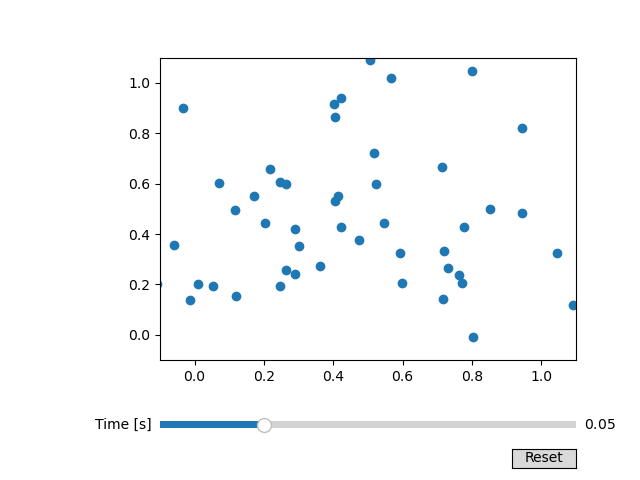

In [3]:
""" drawing birds example """
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# Define initial parameter
init_time = 0.05

# Create the figure and the points that we will manipulate
fig, ax = plt.subplots()
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
bird_points = plt.scatter(*(birds.sol(init_time).reshape(-1,4)[:,:2].T))

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the time.
axtime = fig.add_axes([0.25, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax = axtime,
    label='Time [s]',
    valmin=0,
    valmax=0.2,
    valinit=init_time,
)

# The function to be called anytime a slider's value changes
def update(val):
    bird_points.set_offsets(birds.sol(time_slider.val).reshape(-1,4)[:,:2])
    fig.canvas.draw_idle()

# register the update function with each slider    
time_slider.on_changed(update)

resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    time_slider.reset()
button.on_clicked(reset)

plt.show()

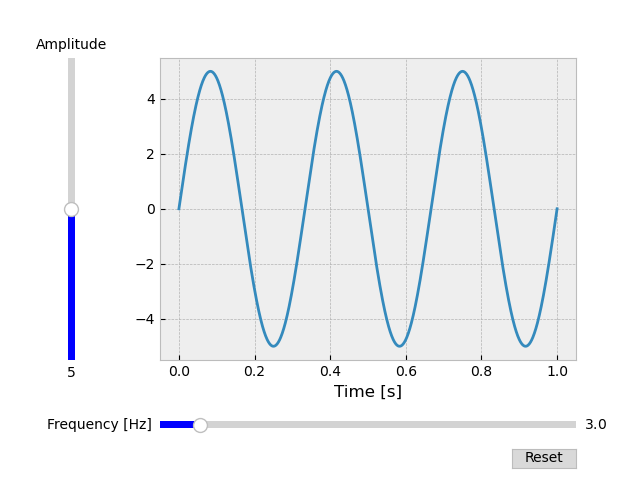

In [6]:
""" matplotlib sliders example from https://matplotlib.org/stable/gallery/widgets/slider_demo.html """
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

### Animation

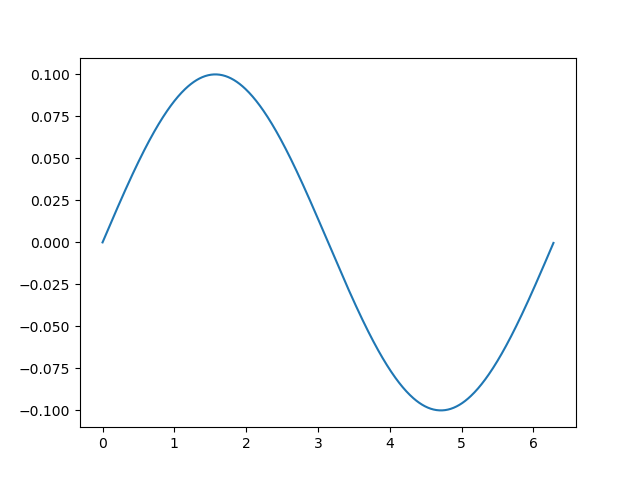

In [4]:
""" Again start with an example from docs from the page:
        https://matplotlib.org/stable/api/animation_api.html 
    there an example- animated line plot:
        https://matplotlib.org/stable/gallery/animation/simple_anim.html
    """
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x)*0.1)


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

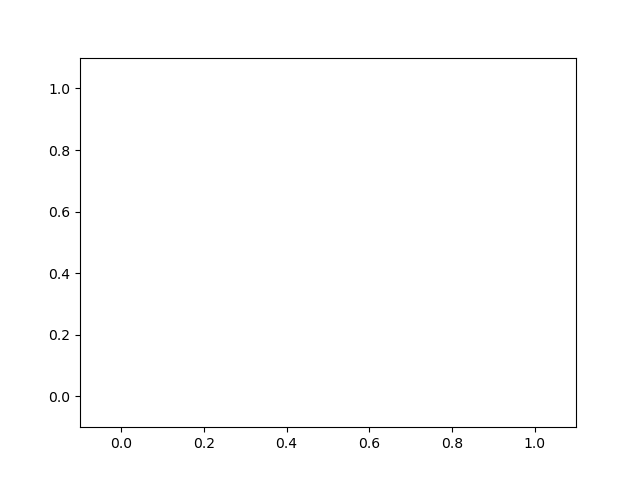

In [5]:
""" Change the example to fit our problem """
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create the figure and the points that we will animate
fig, ax = plt.subplots()
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])

# birds_anim = plt.scatter(*(birds.sol(0).reshape(-1,4)[:,:2].T))
birds_anim = plt.scatter([],[])

def animate(i):
    birds_anim.set_offsets(birds.sol(i).reshape(-1,4)[:,:2])  # update the data.
    return birds_anim,

# frames of the future animation
ani_frames = np.linspace(0,0.2,200)

ani = animation.FuncAnimation(
    fig, animate, interval=40, blit=False, frames = ani_frames, repeat = False)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

### Simulation 
Example below is heavly inspiread by: https://youtu.be/Ercd-Ip5PfQ


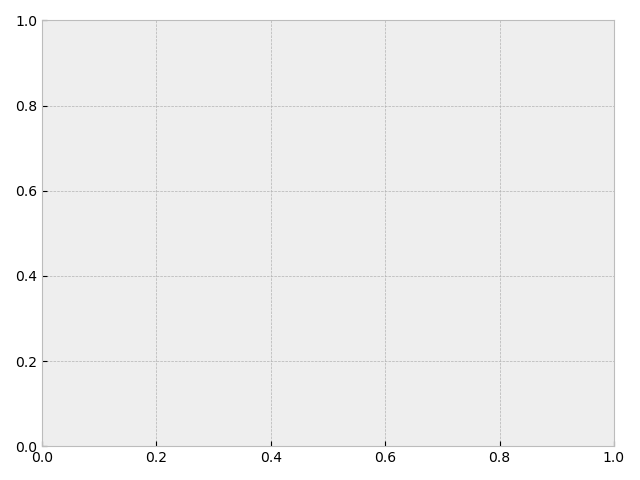

In [4]:
%matplotlib widget

import numpy as np
from numpy.random import default_rng, SeedSequence

from itertools import count
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
plt.style.use('bmh')#('fivethirtyeight')


seed1=12345
rng1 = default_rng(SeedSequence(seed1))
seed2=123456
rng2 = default_rng(SeedSequence(seed2))


index = count()
x_vals = [-1]
y_vals1 = [0]
y_vals2 = [0]

def animate(i):
    x_vals.append(next(index))
    
    y_vals1.append(y_vals1[-1]+rng1.normal(loc=0.0, scale=1.0))
    y_vals2.append(y_vals2[-1]+rng2.normal(loc=0.0, scale=1.0))
    ax.cla()
    ax.plot(x_vals, y_vals1, c='tab:blue')
    ax.plot(x_vals, y_vals2, c='tab:orange')
    return ax,

ani = FuncAnimation(plt.gcf(), animate, interval=500)

plt.tight_layout()
plt.show()

#### Reproduction of random generator
Let's say that we want to create a reproducible plot of the kind above but with arbitrary number of random walks.
SeedSequence comes to our aid.

In [2]:
import numpy as np
from numpy.random import default_rng, SeedSequence

ss = SeedSequence(12345)
child_seeds = ss.spawn(2)
rngs = [default_rng(s) for s in child_seeds]

In [3]:
""" check what child seeds are """
child_seeds

[SeedSequence(
     entropy=12345,
     spawn_key=(0,),
 ),
 SeedSequence(
     entropy=12345,
     spawn_key=(1,),
 )]

In [4]:
""" now you can reproduce the randomly generated numbers in some organised manner """
ss = SeedSequence(12345)
child_seeds = ss.spawn(2)
rngs = [default_rng(s) for s in child_seeds]
print(child_seeds[0])
rngs[0].normal(loc=0.0, scale=1.0, size=5)

SeedSequence(
    entropy=12345,
    spawn_key=(0,),
)


array([ 1.78751978, -0.4886409 ,  1.08237292, -0.449911  , -0.54109887])

In [5]:
""" is the same as """
ss_custom = SeedSequence(12345, spawn_key=(0,))
default_rng(ss_custom).normal(loc=0.0, scale=1.0, size=5)

array([ 1.78751978, -0.4886409 ,  1.08237292, -0.449911  , -0.54109887])

In [6]:
""" because default_rng is determined by SeedSequence """
print(SeedSequence(12345, spawn_key=(0,),) ,'\n', child_seeds[0])

# """ every element of seed sequence can spawn more seed sequences with the same spawn procedure like this:"""
# grand_childs = child_seeds[1].spawn(3)

# """ Their spawn_key is has now two elements indicating they are childs of (1,) """
# print(grand_childs)

# """ Original SeedSequence are also updated."""
# print(ss,child_seeds)

SeedSequence(
    entropy=12345,
    spawn_key=(0,),
) 
 SeedSequence(
    entropy=12345,
    spawn_key=(0,),
)


#### Let's update our simulation of random walk

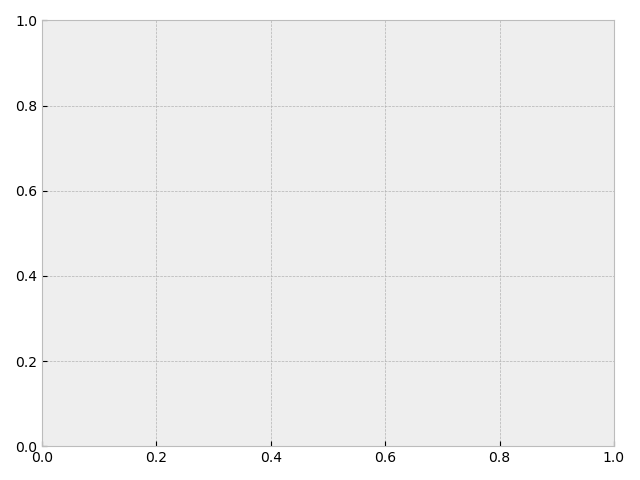

In [5]:
%matplotlib widget

import numpy as np
from numpy.random import default_rng, SeedSequence

from itertools import count
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
plt.style.use('bmh')#('fivethirtyeight')

seed = 12345
num_of_walks = 3

ss = SeedSequence(seed)
child_seeds = ss.spawn(num_of_walks)
rngs = [default_rng(s) for s in child_seeds]

index = count()
x_vals = [-1]
y_vals = [ [0] for _ in range(num_of_walks)]

def animate(i):
    x_vals.append(next(index))
    # below we cannot iterate over y_vals, since we change y_vals during the process
    for i in range(num_of_walks): 
        y_vals[i].append(y_vals[i][-1] + rngs[i].normal(loc=0.0, scale=1.0))
    ax.cla()
    ax.plot(x_vals, y_vals[0], c='tab:blue')
    ax.plot(x_vals, y_vals[1], c='tab:orange')
    ax.plot(x_vals, y_vals[2], c='tab:green')
    return ax,

ani = FuncAnimation(plt.gcf(), animate, interval=100)

plt.tight_layout()
plt.show()

In [3]:
""" The difference list comrechension vs. [[0]]*n example with append"""
num_of_walks = 3
y_vals = [ [0] for _ in range(num_of_walks)]
y_vals_copy = y_vals.copy()

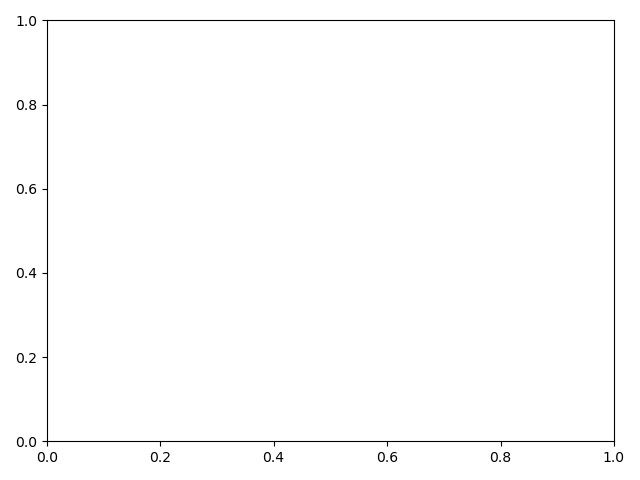

In [4]:
%matplotlib widget

import numpy as np
from numpy.random import default_rng, SeedSequence

from itertools import count
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
plt.style.use('bmh')#('fivethirtyeight')

seed = 12345
num_of_walks = 5

ss = SeedSequence(seed)
child_seeds = ss.spawn(num_of_walks)
rngs = [default_rng(s) for s in child_seeds]

index = count()
x_vals = [-1]
y_vals = [ [0] for _ in range(num_of_walks)]

def animate(i):
    x_vals.append(next(index))
    # below we cannot iterate over y_vals, since we change y_vals during the process
    for i in range(num_of_walks): 
        y_vals[i].append(y_vals[i][-1] + rngs[i].normal(loc=0.0, scale=1.0))
    ax.cla()
    for i in range(num_of_walks): 
        ax.plot(x_vals, y_vals[i])
    return ax,

ani = FuncAnimation(plt.gcf(), animate, interval=5)

plt.tight_layout()
plt.show()

### Colors in matplotlib
How to control colors of series of plots. In the example above they are drawn in the same order thats why it works. but if we wanted to control color we need to:

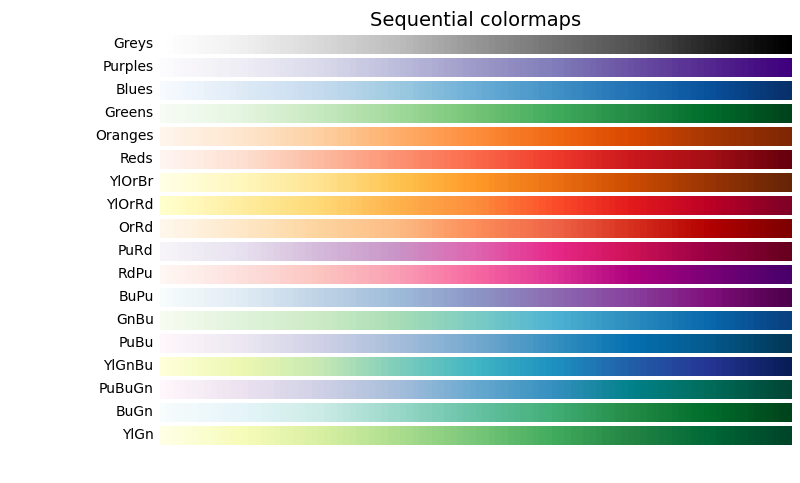

In [6]:
""" Example: https://matplotlib.org/stable/tutorials/colors/colormaps.html"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


cmaps = {}

gradient = np.linspace(0, 1, 100)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(8,figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

Let's use colormap to color arbitrary number of random walks.
1. Every walk has one color.
2. Color depends on the value (like a height map)

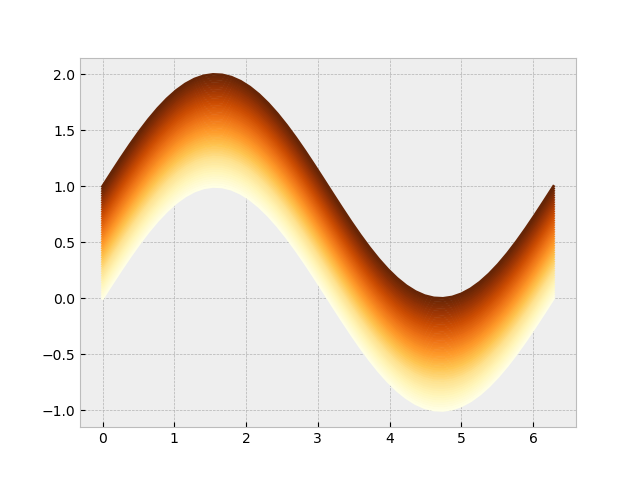

In [6]:
%matplotlib widget

import numpy as np
# from numpy.random import default_rng, SeedSequence

# from itertools import count
import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
plt.style.use('bmh')

num = 50 #check 50
pts = np.linspace(0, 2*np.pi, 50)
col = np.linspace(0,1,num)

for i,c in enumerate(col):
    ax.plot(pts,np.sin(pts)+c, color=mpl.colormaps['YlOrBr'](c))



Plot colors a line so to draw a line/curve with many colors we have to use differet method of drawing.\
Let's see the example form: https://matplotlib.org/stable/gallery/color/color_by_yvalue.html

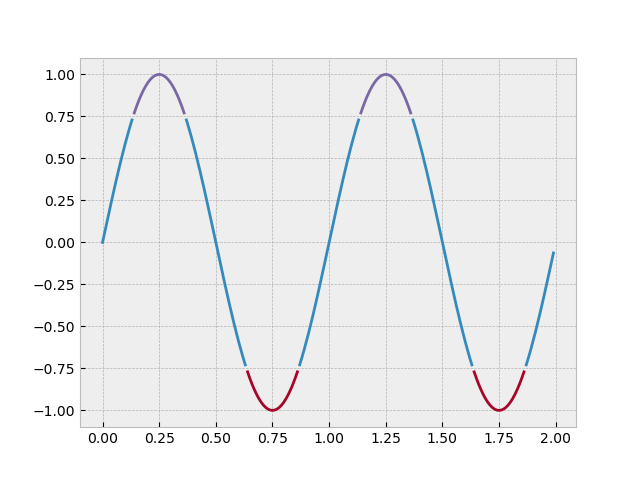

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

upper = 0.77
lower = -0.77

supper = np.ma.masked_where(s < upper, s)
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where((s < lower) | (s > upper), s)
#discuss masked_where

fig, ax = plt.subplots()
ax.plot(t, smiddle, t, slower, t, supper)
plt.show()

# """ Notice the syntax of ax.plot allow for :""" 
# fig, ax = plt.subplots()
# ax.plot(t, smiddle,'--', t, slower,'r', t, supper,'g-.')
# plt.show()

To obtain smooth color of plot we may use scatter: 

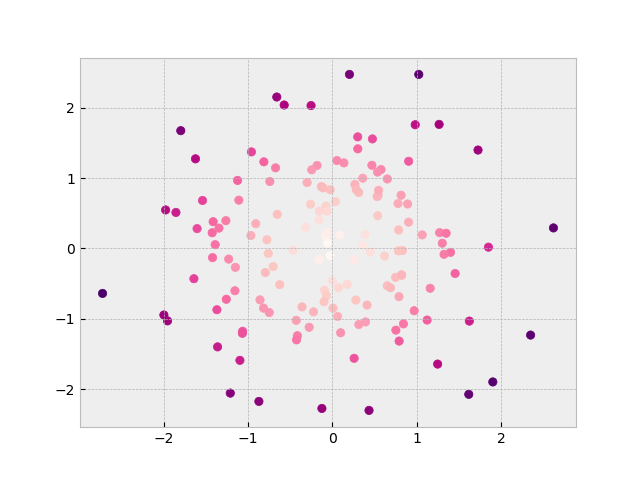

In [11]:
import numpy as np
from numpy.random import default_rng, SeedSequence

import matplotlib.pyplot as plt


n, seed = 150, 12345
rng = default_rng(SeedSequence(seed))

x = rng.standard_normal(n)
y = rng.standard_normal(n)


fig, ax = plt.subplots()

# ax.scatter(x, y, c=y, cmap='RdPu') # discuss parameters c= and cmap=

""" Example of coloring as distance from the point (0,0)"""
pts = np.stack([x,y]).T
dists = np.linalg.norm(pts,axis=1)
ax.scatter(x, y, c=dists, cmap='RdPu')

plt.show()

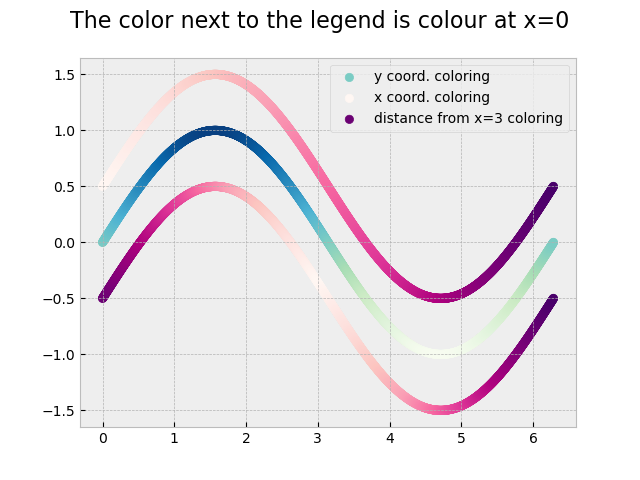

In [13]:
import numpy as np
from numpy.random import default_rng, SeedSequence


n, seed = 150, 12345
rng = default_rng(SeedSequence(seed))

pts = np.linspace(0, 2*np.pi, 2000)
val = np.sin(pts)

fig, ax = plt.subplots()
fig.suptitle('The color next to the legend is colour at x=0', fontsize=16)

ax.scatter(pts, val, c=val, cmap='GnBu',
           label='y coord. coloring')
ax.scatter(pts, val+0.5, c=pts, cmap='RdPu',
           label='x coord. coloring')
ax.scatter(pts, val-0.5, c=np.abs(pts-3), cmap='RdPu',
           label='distance from x=3 coloring' )

ax.legend()
plt.show()

There is yet another way to color line plot (so not a scatter plot) with color depending on some function or defined otherwise.\
Example is given in documentation: [Multicolored lines](https://matplotlib.org/stable/gallery/lines_bars_and_markers/multicolored_line.html)

#### Arguments, stars, commas, value assiments  
In argument of a function: https://youtu.be/R8-oAqCgHag 
In assigning: https://stackoverflow.com/questions/6967632/unpacking-extended-unpacking-and-nested-extended-unpacking

Note that we have \
```return ax,```

In [39]:
var = 1
var, # comma makes var, into a tuple with one element

(1,)

### q - closest
For few birds it is easier and faster to calculate distance from every to every bird\
and choose k smallest numbers. At some number of birds this becomes to many and its better to\
have some method for "look for birds close by", one of those methods is using [KDTree](https://en.wikipedia.org/wiki/K-d_tree).

In [14]:
""" input: """
import numpy as np
y0 = set_random_y0(5,12346)

In [30]:
""" define a function that points and calculates distances to q-closest distances for each bird """

def q_close_birds_crude(q, data_array):
    """ Parameters
        q          : number of birds to find 
        data_array : data with position of birds from the CS model
        Return 
        Two arrays with identifiers of closest birds and distances """
    
    pos = data_array[:,:2]
    # n = len(pos)
    
    #diffrences between points ( check the broadcasting done in expression a[np.newaxis, :]- b[:, np.newaxis] )
    diff = np.linalg.norm(pos[np.newaxis, :, :]- pos[:, np.newaxis, :], axis=2)
    
    # For every bird(row) we need to find q smallest numbers in diffs and also find their indices.
    # We do not need to sort rows, we only want q smallest numbers, thus we can use faster method i.e. np.partition instead of np.sort.
    # In i-th row of *partitions the first q places are smaller-equal than the (q+1)st place and in those (q+1) places there is i since distance from i-th to i-th is 0.
    partitions = np.argpartition(diff, kth=q+1, axis=1)[:,:q+1]
    
    # The other methods(KDTree) return distances and indices thus to write more flexible code lets return the same thing 
    q_closest_dists = np.take_along_axis(diff, partitions, axis=1)
    
    return q_closest_dists, partitions

In [31]:
q_close_birds_crude(2, y0)

(array([[0.        , 0.44023285, 0.50587553],
        [0.6545921 , 0.26013327, 0.        ],
        [0.06816696, 0.        , 0.44023285],
        [0.        , 0.06816696, 0.50587553],
        [0.74409893, 0.        , 0.26013327]]),
 array([[0, 2, 3],
        [3, 4, 1],
        [3, 2, 0],
        [3, 2, 0],
        [3, 4, 1]], dtype=int64))

#### Comment on diff and broadcasting :
The definition of ```diff``` in ```def q_close_birds_crude ``` is another way of\
writing ```pos_diffs``` from from the ```def rhs_d_vel``` above.\
Those differences without using broadcasting are:\
    ```np.stack([pos]*N, axis=0) - np.stack([pos]*N, axis=1)```\
and with broadcasting they are:\
    ```pos[np.newaxis, :, :]- pos[:, np.newaxis, :]```

In [29]:
#check how this work for short list:

a = np.array([1,2,3,4,5])
list_len = len(a)

print(a[np.newaxis, :]- a[:, np.newaxis]) 
# print(a[:, np.newaxis]- a[np.newaxis, :]) # different order of np.newaxis
# print(np.stack([a]*list_len, axis=0) - np.stack([a]*list_len, axis=1)) # array stacking

[[ 0  1  2  3  4]
 [-1  0  1  2  3]
 [-2 -1  0  1  2]
 [-3 -2 -1  0  1]
 [-4 -3 -2 -1  0]]


In [42]:
# at this point it is also worth to remind that you may use
# any function to result of broadcast of two arrays:
a = np.array([1,2,3,4,5])
def yourfunc(x,y):
    return x-y

np.vectorize(yourfunc)(a[np.newaxis,:],b[:,np.newaxis])

array([[ 0,  1,  2,  3,  4],
       [-1,  0,  1,  2,  3],
       [-2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1],
       [-4, -3, -2, -1,  0]])

In [124]:
# and that there exist broadcast object that works similar to np.meshgrid
sa = np.array([1,2,3])
iterable_object = np.broadcast(sa[np.newaxis,:], sa[:,np.newaxis])

for i, el in enumerate(iterable_object):
    print(f" At {i:2}{'':2} is {'':3}{el}")

 At  0   is    (1, 1)
 At  1   is    (2, 1)
 At  2   is    (3, 1)
 At  3   is    (1, 2)
 At  4   is    (2, 2)
 At  5   is    (3, 2)
 At  6   is    (1, 3)
 At  7   is    (2, 3)
 At  8   is    (3, 3)


#### Back to q - closest, this time with KDTree
If the number of birds is big (>500? run your experiments) my fast numpy brute force was slower than using KDTree.

In [32]:
from scipy.spatial import KDTree

# we construct a tree that we use
tree = KDTree(y0[:,:2])

In [34]:
# query the free at one point:
tree.query(np.array([[1,1]]), k=3)

(array([[0.62087163, 0.68471266, 0.96257952]]),
 array([[3, 2, 4]], dtype=int64))

In [121]:
# query the free at two points:
list_of_points = np.array([[0.5,0.5],
                           [0  ,  0]])
tree.query(list_of_points, k=3)

(array([[0.2041533 , 0.21456443, 0.24313005],
        [0.11867665, 0.25302726, 0.51393255]]),
 array([[7, 2, 6],
        [1, 5, 7]], dtype=int64))

In [35]:
# now if we query the *tree at all the points of y0
# we should obtain (up to order) the same result as in *q_close_birds_crude
tree.query(y0[:,:2], k=3)

(array([[0.        , 0.44023285, 0.50587553],
        [0.        , 0.26013327, 0.6545921 ],
        [0.        , 0.06816696, 0.44023285],
        [0.        , 0.06816696, 0.50587553],
        [0.        , 0.26013327, 0.74409893]]),
 array([[0, 2, 3],
        [1, 4, 3],
        [2, 3, 0],
        [3, 2, 0],
        [4, 1, 3]], dtype=int64))

##### Exercise:
Make an interactive figure that draws an interval from the mouse position to the nearest point of y0.\
You can look for inspiration for example [here](https://matplotlib.org/stable/gallery/event_handling/cursor_demo.html) or in the whole [event handling](https://matplotlib.org/stable/gallery/event_handling/index.html) section.

### Rhs for q-closest
We modify rhs_func in such a way that the derivative of velocities depends only on q closest.\
We should be able to switch between\
```q_close_birds_crude(q, data_array)```\
and\
```tree.query(y0[:,:2], k=q)```\
which both have signature:\
```q, data -> q_closest_dists, partitions```

#### We need to change function below:
```python
    def rhs_d_vel(y, mass=0, comm_weight=0):
        """ docs """
        #split position and velocity
        N = len(y)
        vel = y.copy()
        vel[:,0], vel[:,1] = 0, 0
        pos = y.copy()
        pos[:,2], pos[:,3] = 0, 0
        
        # partitions tells us which vestors to sum start with:
        dists, parts = q_close_birds_crude(q, data_array)
        
        # differences of vectors but only at indecies in *parts
        
        """ look below for derivation of the diffrences but only from indecies"""

        # stack of matricies of all diferences of velocities
        vel_diff = np.stack([vel]*N,axis=0) - np.stack([vel]*N,axis=1)

        # stack of matricies of all diferences of position
        pos_diffs = np.stack([pos]*N,axis=0) - np.stack([pos]*N,axis=1)

        # the values of eta function on distances 
        vcomm_weight = np.vectorize(comm_weight)
        weighted_diffs = vcomm_weight(np.linalg.norm(pos_diffs, axis=2, keepdims=True))

        return np.sum( weighted_diffs*vel_diff, axis=1 )
```

####  Diffrences like with np.stack OR  with broadcasting but only at indecies found by q_close.
Funtion ```q_close``` returns, for every bird(row), indecies of q closest other birds (rows).\
We want to find diffrences but only between velocities at places given by\
```partitions``` <- second output from ```q_close_birds_crude``` or ```tree.query(birds[:,:2], k=3)```.

In [3]:
# let say we have a matrix *a and *choices
a = np.arange(10).reshape(-1,2)
a[:,0] = 0 

choices = np.array([[2,4,0],[1,0,2],[1,2,3],[3,0,2],[0,3,4]])
print(f"a=\n{a} \n choices =\n{choices}")

a=
[[0 1]
 [0 3]
 [0 5]
 [0 7]
 [0 9]] 
 choices =
[[2 4 0]
 [1 0 2]
 [1 2 3]
 [3 0 2]
 [0 3 4]]


Array named a mimics velocities.
Array named choices mimics the output from q_close_birds_crude.\
This means that:\
   -from the first point  it is closest to indecies 2 and 4,\
   -from the second point it is closest to indecies 0 and 2, etc.\
therefore we should produce array which has:

In [49]:
[a[[]],0]

array([[0, 1],
       [0, 1]])

##### Slicing examples
We basically need to slice array *a at *chocies.\
We can slice array with an array, lets try:

In [16]:
print(f"* a[1]=\n{a[1]} <- at level 0 (argument of slicing i.e. a[ here ]) we placed 1 this is second element and it is second list from *a.")

# print(f"* a[0, 1]=\n{a[0, 1]} <- a[0, 1] is the same as a[0][1]")
# print(f"* a[[0,1]]=\n{a[[0,1]]} <- at level 0 we placed a list [0,1], slicing is then mapped and we obtain [ a[0], a[1] ]")

# print(f"* a[[[2,3]]]=\n{a[[[2,3]]]} <- at level 0 we placed [[2,3]], slicing is then mapped resulting in [ a[[2, 3]] ]\n\
#     which is mapped again and we obtain [[a[2],a[3]]]and this is the result.")
# print(f"* a[[[0,1],[0,1]]]=\n{a[[[0,1],[0,1]]]} <- at level 0 we placed [[0,1],[0,1]], slicing is then mapped resulting in [ a[[0,1]], a[[0,1]] ] \n\
#     which is mapped again and we obtain[ [a[0], a[1]], [a[0], a[1]] ] ")

# print(f"* The above procedure allow to create new arrays build from parts of *a \n\
#     a[ [[0,1],[0,1],[2,3]] ]=\n{a[[[0,1], [0,1], [2,3]]]}")

# print(f"* Observe the shape of the result compared with the slice:\n\
#     Array has shape {a.shape}")
# print(f"* Slice has a shape {np.array([[0,1], [0,1], [2,3]]).shape},\n\
#     resulting array has shape {a[[[0,1], [0,1], [2,3]]].shape}")

* a[1]=
[0 3] <- at level 0 (argument of slicing i.e. a[ here ]) we placed 1 this is second element and it is second list from *a.


In [18]:
# If we need more control and clarity we can use function called np.take which has an advantage: we can choose axis.
print(f"\
{np.take(a, 0, axis=0)}\n\
{np.take(a, 0, axis=1)}\n\
{np.take(a, [1], axis=0)}\n\
{np.take(a, [1], axis=1)}\n\
")

[0 1]
[0 0 0 0 0]
[[0 3]]
[[1]
 [3]
 [5]
 [7]
 [9]]



In [241]:
# At this point we have to say: 
# we want rows (<- this is the reason for axis=0)
# with indecies written in choices:
# in the first array we want rows with numbers [2 ,1, 1, 3, 0], this is the first elemnt of choices.T
choices.T[0]

array([2, 1, 1, 3, 0])

In [252]:
# Therefore the first array will be:
a[choices.T[0]]
# or 
np.take(a, choices.T[0], axis=0)

array([[0, 5],
       [0, 3],
       [0, 3],
       [0, 7],
       [0, 1]])

In [254]:
# the second array:
a[choices.T[1]]
# or
np.take(a, choices.T[1], axis=0)

array([[0, 9],
       [0, 1],
       [0, 5],
       [0, 1],
       [0, 7]])

In [255]:
# and the last one (for q=2):
a[choices.T[2]]
# or
np.take(a, choices.T[2], axis=0)

array([[0, 1],
       [0, 5],
       [0, 7],
       [0, 5],
       [0, 9]])

In [50]:
a[choices.T]

array([[[0, 5],
        [0, 3],
        [0, 3],
        [0, 7],
        [0, 1]],

       [[0, 9],
        [0, 1],
        [0, 5],
        [0, 1],
        [0, 7]],

       [[0, 1],
        [0, 5],
        [0, 7],
        [0, 5],
        [0, 9]]])

In [260]:
# The array we need is np.take(a, choices.T, axis=0)
print(np.take(a, choices.T, axis=0))
# which is the same as a[choices.T] becasue of how mapping and slicing works and becasue we "needed rows".

[[[0 5]
  [0 3]
  [0 3]
  [0 7]
  [0 1]]

 [[0 9]
  [0 1]
  [0 5]
  [0 1]
  [0 7]]

 [[0 1]
  [0 5]
  [0 7]
  [0 5]
  [0 9]]]


#### Changing rhs_func to include q closest points.

In [161]:
# data to work with

n, q = 6, 3
y0 = set_random_y0(n,12346)
# print(y0)

# set names like inside rhs_func_q
vel = y0.copy()
vel[:,0], vel[:,1] = 0, 0
pos = y0.copy()
pos[:,2], pos[:,3] = 0, 0
# print(f"{pos},\n{vel}")

from scipy.spatial import KDTree
tree = KDTree(y0[:,:2])
print(tree.query(y0[:,:2], k=q))
print(q_close_birds_crude(q-1, y0[:,:2]))

(array([[0.        , 0.23576759, 0.33174838],
       [0.        , 0.26730723, 0.45256752],
       [0.        , 0.23576759, 0.39287042],
       [0.        , 0.33174838, 0.39287042],
       [0.        , 0.18882605, 0.26730723],
       [0.        , 0.18882605, 0.45256752]]), array([[0, 2, 3],
       [1, 4, 5],
       [2, 0, 3],
       [3, 0, 2],
       [4, 5, 1],
       [5, 4, 1]], dtype=int64))
(array([[0.        , 0.23576759, 0.33174838],
       [0.26730723, 0.45256752, 0.        ],
       [0.        , 0.23576759, 0.39287042],
       [0.        , 0.33174838, 0.39287042],
       [0.        , 0.18882605, 0.26730723],
       [0.18882605, 0.        , 0.45256752]]), array([[0, 2, 3],
       [4, 5, 1],
       [2, 0, 3],
       [3, 0, 2],
       [4, 5, 1],
       [4, 5, 1]], dtype=int64))


In [162]:
# the differences of vectors:
# dists, parts = tree.query(y0[:,:2], k=q)
dists, parts = q_close_birds_crude(q-1, y0[:,:2])
vel_diff = np.stack([vel]*(q),axis=0) - np.take(vel, parts.T, axis=0)
print(vel_diff)

[[[ 0.          0.          0.          0.        ]
  [ 0.          0.          0.15329231  0.34959565]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.42686554  1.2063216 ]]

 [[ 0.          0.         -1.37481578 -0.29092964]
  [ 0.          0.         -0.27357323 -0.85672595]
  [ 0.          0.          1.37481578  0.29092964]
  [ 0.          0.          2.58802512  0.27075262]
  [ 0.          0.         -0.42686554 -1.2063216 ]
  [ 0.          0.          0.          0.        ]]

 [[ 0.          0.         -2.58802512 -0.27075262]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.         -1.21320934  0.02017703]
  [ 0.          0.          1.21320934 -0.02017703]
  [ 0.          0.         -0.15329231 -0.34959565]
  [ 0.          0.          0.27357323  0.85672595]]]


In [163]:
# preparing the distances to multiply
# print(dists)

vcomm_weight = np.vectorize(comm_weight)
weighted_diffs = vcomm_weight(dists)
print(weighted_diffs)
print(weighted_diffs.T.reshape(3,6,1))

[[0.         3.17696711 2.41742466]
 [2.87336925 1.88561616 0.        ]
 [0.         3.17696711 2.11154594]
 [0.         2.41742466 2.11154594]
 [0.         3.79446438 2.87336925]
 [3.79446438 0.         1.88561616]]
[[[0.        ]
  [2.87336925]
  [0.        ]
  [0.        ]
  [0.        ]
  [3.79446438]]

 [[3.17696711]
  [1.88561616]
  [3.17696711]
  [2.41742466]
  [3.79446438]
  [0.        ]]

 [[2.41742466]
  [0.        ]
  [2.11154594]
  [2.11154594]
  [2.87336925]
  [1.88561616]]]


In [147]:
 np.array([-1.37481578,-0.29092964])*3.17696711

array([-4.36774452, -0.9242739 ])

In [164]:
# the result before summations looks like: 
weighted_diffs.T.reshape(3,6,1) * vel_diff

array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.4404654 ,  1.0045174 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.61972607,  4.57734434]],

       [[ 0.        ,  0.        , -4.36774451, -0.9242739 ],
        [ 0.        ,  0.        , -0.5158541 , -1.6154563 ],
        [ 0.        ,  0.        ,  4.36774451,  0.9242739 ],
        [ 0.        ,  0.        ,  6.25635573,  0.65452405],
        [ 0.        ,  0.        , -1.61972607, -4.57734434],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        , -6.25635573, -0.65452405],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        , -2.56174726,  0.04260472],
        [ 0.        ,  0.        ,  2.56174726, -0.04260472],
    

In [165]:
# The final result of rhs_d_vel_q 
# (i checked once if the sum result is the same for tree.query and q_close_birds_crude. <- it was the same)
np.sum(weighted_diffs.T.reshape(3,6,1) * vel_diff, axis=0)

array([[  0.        ,   0.        , -10.62410024,  -1.57879795],
       [  0.        ,   0.        ,  -0.0753887 ,  -0.6109389 ],
       [  0.        ,   0.        ,   1.80599725,   0.96687861],
       [  0.        ,   0.        ,   8.81810299,   0.61191933],
       [  0.        ,   0.        ,  -2.06019147,  -5.58186174],
       [  0.        ,   0.        ,   2.13558017,   6.19280064]])

#### Back to rhs for q_closest

In [192]:
def comm_weight(s):
    """Communication weight in Cucker-Smale model"""
    return np.float_power(s, -0.8, out=np.zeros_like(s), where=s!=0)

In [198]:
def rhs_func_q(t: float, y: np.ndarray, mass: np.ndarray, comm_weight: Callable, q: int)-> np.ndarray:
    """ The splitting of dx and dv is done here. 
            t           : independent variable in the ODE
            y           : CS_data_point of the shape (N*4,)
            mass        : array of "masses" we can set that some birds are more important than other
            comm_weight : callable 'communication weight' funtion
            q           : how many neighbours should bird follow, should be <= len(y)
        """
    def rhs_d_pos(y):
        u = y.copy()
        u[:,0], u[:,1] = 0, 0    # zeroing the position
        return u[:,[2,3,0,1]]    # velocities go to the front

    def rhs_d_vel_q(y, q: int, mass=0, comm_weight=0):
        """ docs """
        #split position and velocity
        N = len(y)
        vel = y.copy()
        vel[:,0], vel[:,1] = 0, 0
        pos = y.copy()
        pos[:,2], pos[:,3] = 0, 0

        # partitions tells us which vestors to sum:
        dists, parts = q_close_birds_crude(q-1, pos)

        # differences of vectors but only at indecies in *parts
        vel_diff = np.take(vel, parts.T, axis=0) - np.stack([vel]*(q),axis=0)

        # the values of eta function on distances 
        vcomm_weight = np.vectorize(comm_weight)
        weighted_diffs = vcomm_weight(dists).T.reshape(q,N,1)
        
        # we keep multiplied differences in q+1 arrays, to obtain the sum we should add over axis=0
        return np.sum(weighted_diffs * vel_diff, axis=0)

    # N = len(y)
    y = y.reshape(-1,4)    # this is for technical reasons = solve_ivp was not working for me with the .shape =(N, 4) so i'm using .shape=(N*4,)
    x_derivatives = rhs_d_pos(y)
    y_derivatives = rhs_d_vel_q(y, q, mass, comm_weight)
    rhs = x_derivatives + y_derivatives
    return rhs.ravel()

n=20
y0 = set_random_y0(n,12346)

from scipy.integrate import solve_ivp
birds_q = solve_ivp(lambda t, y: rhs_func_q(t , y, 0, comm_weight, 3),
        (0, 0.5),
        y0.ravel(),
        method='RK45',
        # t_eval = np.linspace(self.t0, self.t0+self.duration, int(self.duration*self.fps/self.speed)),
        dense_output=True
        )
birds_q.message

'The solver successfully reached the end of the integration interval.'

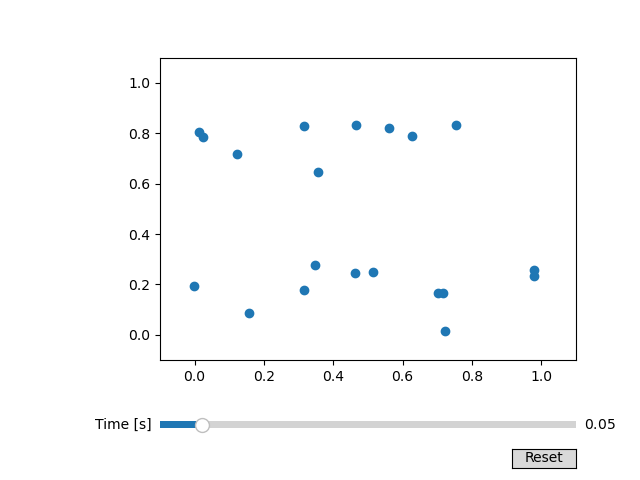

In [200]:
""" drawing birds_q example """
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# Define initial parameter
init_time = 0.05

# Create the figure and the points that we will manipulate
fig, ax = plt.subplots()
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
bird_points = plt.scatter(*(birds_q.sol(init_time).reshape(-1,4)[:,:2].T))

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the time.
axtime = fig.add_axes([0.25, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax = axtime,
    label='Time [s]',
    valmin=0,
    valmax=0.5,
    valinit=init_time,
)

# The function to be called anytime a slider's value changes
def update(val):
    bird_points.set_offsets(birds_q.sol(time_slider.val).reshape(-1,4)[:,:2])
    fig.canvas.draw_idle()

# register the update function with each slider    
time_slider.on_changed(update)

resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    time_slider.reset()
button.on_clicked(reset)

plt.show()

### Exercise. Make it on Torus.
Hints:
1) (The solution used in Cucker-Smale-flocking-movies(in 2022.11.14)) You can mimic torus behavior making RHS function periodic on\
    the $\mathbb{R}^2$ i.e. birds are not only in the $[0,1]\times[0,1]$, but also in every $(k,l)+[0,1]\times[0,1]$ for $k,l \in \mathbb{Z}$ and distance\
    function has to be cropped to the $[0,1]\times[0,1]$ window.
2) The cells with drawing and calculating the solutions are already too big, when writing functions I advice to split functions into different\
    cells or better different python files which are later imported.